# 方差过滤

In [1]:
#1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# 2.导入数据集，探索数据
data = pd.read_csv(r"C:\Users\ASUS\Desktop\EEG\feature_analysis\ours\S7\s7_132.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Columns: 153 entries, mean_0 to Label
dtypes: float64(153)
memory usage: 1.5 MB


In [3]:
data.shape

(1325, 153)

In [4]:
data.head()

mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  0.1530  -0.137  0.1670 -0.03840        -0.8430         0.0311   
1 -0.7460   0.144 -0.1160  0.05970         5.0300        -0.6760   
2 -4.7200   0.935 -0.5150 -0.00777        -3.4600         0.2290   
3  0.0127   0.154 -0.0551  0.01070         0.0886        -0.5840   
4  1.6400   1.160 -0.1070 -0.08370        -6.4100        -0.4470   

   mean_d_h2h1_2  mean_d_h2h1_3  mean_q1_0  mean_q1_1  ...  min_d_q2q3_3  \
0       -0.14000       -0.00347      0.002    -0.8110  ...          2.30   
1       -0.00497       -0.07460     -4.540     0.4010  ...          3.39   
2       -0.41300        0.95000     -3.630     1.2800  ...         35.60   
3        0.33700        0.00153      0.356     0.0413  ...         -7.93   
4        0.28600       -0.31400      1.840     1.5900  ...        -21.00   

   min_d_q2q4_0  min_d_q2q4_1  min_d_q2q4_2  min_d_q2q4_3  min_d_q3q4_0  \
0          3.83         -0.21         -5.33         -3.46          5.43   
1        -57.50          7.01        -16.80          4.06        -98.80   
2        -64.80         15.20         36.20        -14.00        -10.50   
3         12.40         17.50          3.64         -9.45          6.86   
4        -86.30        -32.10         -2.67        -12.00         -6.67   

   min_d_q3q4_1  min_d_q3q4_2  min_d_q3q4_3  Label  
0         -1.02         -9.25        -5.760    2.0  
1         -7.24        -26.60         0.672    0.0  
2        -19.40         -3.15       -49.600    0.0  
3          6.11        -12.80        -1.520    2.0  
4         -3.24        -25.70         8.980    0.0  

[5 rows x 153 columns]

In [5]:
data.describe()

mean_0       mean_1       mean_2       mean_3  mean_d_h2h1_0  \
count  1325.000000  1325.000000  1325.000000  1325.000000    1325.000000   
mean      0.012854    -0.004540     0.000779     0.000540       0.138249   
std       1.172551     0.370256     0.180058     0.086906       4.812652   
min      -4.930000    -2.370000    -0.799000    -0.804000     -27.300000   
25%      -0.366000    -0.134000    -0.077200    -0.031000      -1.210000   
50%       0.004460     0.003570     0.003030     0.000093       0.033800   
75%       0.352000     0.135000     0.079900     0.029700       1.420000   
max       7.820000     1.840000     0.876000     0.760000      31.700000   

       mean_d_h2h1_1  mean_d_h2h1_2  mean_d_h2h1_3    mean_q1_0    mean_q1_1  \
count    1325.000000    1325.000000    1325.000000  1325.000000  1325.000000   
mean        0.037888      -0.031639      -0.002952     0.160998    -0.062538   
std         1.295229       0.729980       0.304307     6.161196     1.461981   
min        -8.280000      -5.140000      -1.530000   -61.500000   -10.800000   
25%        -0.414000      -0.326000      -0.128000    -1.220000    -0.542000   
50%         0.010700      -0.035400      -0.008350     0.033100     0.006630   
75%         0.433000       0.270000       0.133000     1.450000     0.501000   
max        11.900000       4.050000       1.420000    45.900000     9.540000   

       ...  min_d_q2q3_3  min_d_q2q4_0  min_d_q2q4_1  min_d_q2q4_2  \
count  ...   1325.000000   1325.000000   1325.000000   1325.000000   
mean   ...     -0.773681      1.017598      0.654125     -0.547873   
std    ...     20.985252     96.729608     41.066623     27.647572   
min    ...   -177.000000   -659.000000   -304.000000   -298.000000   
25%    ...     -7.050000    -17.600000    -10.900000     -9.120000   
50%    ...     -0.110000      0.163000     -0.370000     -0.565000   
75%    ...      5.950000     17.700000     10.600000      8.540000   
max    ...    119.000000   1150.000000    216.000000    201.000000   

       min_d_q2q4_3  min_d_q3q4_0  min_d_q3q4_1  min_d_q3q4_2  min_d_q3q4_3  \
count   1325.000000   1325.000000   1325.000000   1325.000000   1325.000000   
mean      -0.586833      0.455782     -1.394212     -1.129583      0.187417   
std       23.042819     84.499566     35.892401     22.535560     19.354121   
min     -173.000000   -443.000000   -327.000000   -111.000000   -113.000000   
25%       -8.410000    -15.800000     -9.570000     -8.390000     -6.610000   
50%       -0.860000     -0.433000     -0.860000     -0.185000      0.207000   
75%        7.390000     15.700000      9.490000      7.240000      6.770000   
max      185.000000   1120.000000    234.000000    153.000000    145.000000   

             Label  
count  1325.000000  
mean      0.963774  
std       0.849854  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  

[8 rows x 153 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所以允许一维

In [7]:
le = LabelEncoder()  # 实例化
le = le.fit(y) # 导入数据
label = le.transform(y) # transform接口调取数据
le.classes_  #属性.classes_查看标签中究竟有多少类别
label

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
le.fit_transform(y)  #也可以直接fit_transform一步到位

array([2, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
le.inverse_transform(label)  #使用inverse_transform可以逆转

array([2., 0., 0., ..., 0., 0., 0.])

In [10]:
data.iloc[:,-1] = label  #让标签等于我们运行出来的结果
data.head()


mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  0.1530  -0.137  0.1670 -0.03840        -0.8430         0.0311   
1 -0.7460   0.144 -0.1160  0.05970         5.0300        -0.6760   
2 -4.7200   0.935 -0.5150 -0.00777        -3.4600         0.2290   
3  0.0127   0.154 -0.0551  0.01070         0.0886        -0.5840   
4  1.6400   1.160 -0.1070 -0.08370        -6.4100        -0.4470   

   mean_d_h2h1_2  mean_d_h2h1_3  mean_q1_0  mean_q1_1  ...  min_d_q2q3_3  \
0       -0.14000       -0.00347      0.002    -0.8110  ...          2.30   
1       -0.00497       -0.07460     -4.540     0.4010  ...          3.39   
2       -0.41300        0.95000     -3.630     1.2800  ...         35.60   
3        0.33700        0.00153      0.356     0.0413  ...         -7.93   
4        0.28600       -0.31400      1.840     1.5900  ...        -21.00   

   min_d_q2q4_0  min_d_q2q4_1  min_d_q2q4_2  min_d_q2q4_3  min_d_q3q4_0  \
0          3.83         -0.21         -5.33         -3.46          5.43   
1        -57.50          7.01        -16.80          4.06        -98.80   
2        -64.80         15.20         36.20        -14.00        -10.50   
3         12.40         17.50          3.64         -9.45          6.86   
4        -86.30        -32.10         -2.67        -12.00         -6.67   

   min_d_q3q4_1  min_d_q3q4_2  min_d_q3q4_3  Label  
0         -1.02         -9.25        -5.760      2  
1         -7.24        -26.60         0.672      0  
2        -19.40         -3.15       -49.600      0  
3          6.11        -12.80        -1.520      2  
4         -3.24        -25.70         8.980      0  

[5 rows x 153 columns]

In [11]:
print(data.columns)

Index(['mean_0', 'mean_1', 'mean_2', 'mean_3', 'mean_d_h2h1_0',
       'mean_d_h2h1_1', 'mean_d_h2h1_2', 'mean_d_h2h1_3', 'mean_q1_0',
       'mean_q1_1',
       ...
       'min_d_q2q3_3', 'min_d_q2q4_0', 'min_d_q2q4_1', 'min_d_q2q4_2',
       'min_d_q2q4_3', 'min_d_q3q4_0', 'min_d_q3q4_1', 'min_d_q3q4_2',
       'min_d_q3q4_3', 'Label'],
      dtype='object', length=153)


In [12]:
data['Label']

0       2
1       0
2       0
3       2
4       0
       ..
1320    2
1321    1
1322    0
1323    0
1324    0
Name: Label, Length: 1325, dtype: int64

In [13]:
data.shape

(1325, 153)

In [14]:
x = data.iloc[:,0:152]
x.head()

mean_0  mean_1  mean_2   mean_3  mean_d_h2h1_0  mean_d_h2h1_1  \
0  0.1530  -0.137  0.1670 -0.03840        -0.8430         0.0311   
1 -0.7460   0.144 -0.1160  0.05970         5.0300        -0.6760   
2 -4.7200   0.935 -0.5150 -0.00777        -3.4600         0.2290   
3  0.0127   0.154 -0.0551  0.01070         0.0886        -0.5840   
4  1.6400   1.160 -0.1070 -0.08370        -6.4100        -0.4470   

   mean_d_h2h1_2  mean_d_h2h1_3  mean_q1_0  mean_q1_1  ...  min_d_q2q3_2  \
0       -0.14000       -0.00347      0.002    -0.8110  ...          3.92   
1       -0.00497       -0.07460     -4.540     0.4010  ...          9.82   
2       -0.41300        0.95000     -3.630     1.2800  ...         39.30   
3        0.33700        0.00153      0.356     0.0413  ...         16.40   
4        0.28600       -0.31400      1.840     1.5900  ...         23.10   

   min_d_q2q3_3  min_d_q2q4_0  min_d_q2q4_1  min_d_q2q4_2  min_d_q2q4_3  \
0          2.30          3.83         -0.21         -5.33         -3.46   
1          3.39        -57.50          7.01        -16.80          4.06   
2         35.60        -64.80         15.20         36.20        -14.00   
3         -7.93         12.40         17.50          3.64         -9.45   
4        -21.00        -86.30        -32.10         -2.67        -12.00   

   min_d_q3q4_0  min_d_q3q4_1  min_d_q3q4_2  min_d_q3q4_3  
0          5.43         -1.02         -9.25        -5.760  
1        -98.80         -7.24        -26.60         0.672  
2        -10.50        -19.40         -3.15       -49.600  
3          6.86          6.11        -12.80        -1.520  
4         -6.67         -3.24        -25.70         8.980  

[5 rows x 152 columns]

In [15]:
x.describe()

mean_0       mean_1       mean_2       mean_3  mean_d_h2h1_0  \
count  1325.000000  1325.000000  1325.000000  1325.000000    1325.000000   
mean      0.012854    -0.004540     0.000779     0.000540       0.138249   
std       1.172551     0.370256     0.180058     0.086906       4.812652   
min      -4.930000    -2.370000    -0.799000    -0.804000     -27.300000   
25%      -0.366000    -0.134000    -0.077200    -0.031000      -1.210000   
50%       0.004460     0.003570     0.003030     0.000093       0.033800   
75%       0.352000     0.135000     0.079900     0.029700       1.420000   
max       7.820000     1.840000     0.876000     0.760000      31.700000   

       mean_d_h2h1_1  mean_d_h2h1_2  mean_d_h2h1_3    mean_q1_0    mean_q1_1  \
count    1325.000000    1325.000000    1325.000000  1325.000000  1325.000000   
mean        0.037888      -0.031639      -0.002952     0.160998    -0.062538   
std         1.295229       0.729980       0.304307     6.161196     1.461981   
min        -8.280000      -5.140000      -1.530000   -61.500000   -10.800000   
25%        -0.414000      -0.326000      -0.128000    -1.220000    -0.542000   
50%         0.010700      -0.035400      -0.008350     0.033100     0.006630   
75%         0.433000       0.270000       0.133000     1.450000     0.501000   
max        11.900000       4.050000       1.420000    45.900000     9.540000   

       ...  min_d_q2q3_2  min_d_q2q3_3  min_d_q2q4_0  min_d_q2q4_1  \
count  ...   1325.000000   1325.000000   1325.000000   1325.000000   
mean   ...      0.584414     -0.773681      1.017598      0.654125   
std    ...     24.651364     20.985252     96.729608     41.066623   
min    ...   -296.000000   -177.000000   -659.000000   -304.000000   
25%    ...     -7.280000     -7.050000    -17.600000    -10.900000   
50%    ...     -0.162000     -0.110000      0.163000     -0.370000   
75%    ...      7.870000      5.950000     17.700000     10.600000   
max    ...    159.000000    119.000000   1150.000000    216.000000   

       min_d_q2q4_2  min_d_q2q4_3  min_d_q3q4_0  min_d_q3q4_1  min_d_q3q4_2  \
count   1325.000000   1325.000000   1325.000000   1325.000000   1325.000000   
mean      -0.547873     -0.586833      0.455782     -1.394212     -1.129583   
std       27.647572     23.042819     84.499566     35.892401     22.535560   
min     -298.000000   -173.000000   -443.000000   -327.000000   -111.000000   
25%       -9.120000     -8.410000    -15.800000     -9.570000     -8.390000   
50%       -0.565000     -0.860000     -0.433000     -0.860000     -0.185000   
75%        8.540000      7.390000     15.700000      9.490000      7.240000   
max      201.000000    185.000000   1120.000000    234.000000    153.000000   

       min_d_q3q4_3  
count   1325.000000  
mean       0.187417  
std       19.354121  
min     -113.000000  
25%       -6.610000  
50%        0.207000  
75%        6.770000  
max      145.000000  

[8 rows x 152 columns]

In [16]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1060, 152) (265, 152) (1060,) (265,)


KNeighborsClassifier
****Results****
Accuracy: 70.1887%
Log Loss: 4.184693380400435
SVC
****Results****
Accuracy: 62.2642%
Log Loss: 0.7885853491422924
NuSVC
****Results****
Accuracy: 62.2642%
Log Loss: 0.7380600374913461
RandomForestClassifier
****Results****
Accuracy: 92.4528%
Log Loss: 0.31168675825199915
ExtraTreesClassifier
****Results****
Accuracy: 92.4528%
Log Loss: 0.16602330009904265
LGBMClassifier
****Results****
Accuracy: 93.2075%
Log Loss: 0.24684757675162514
LinearDiscriminantAnalysis
****Results****
Accuracy: 55.4717%
Log Loss: 1.0592608602469384
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 87.1698%
Log Loss: 3.2856168991518047


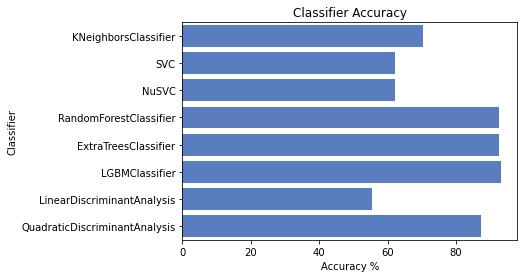

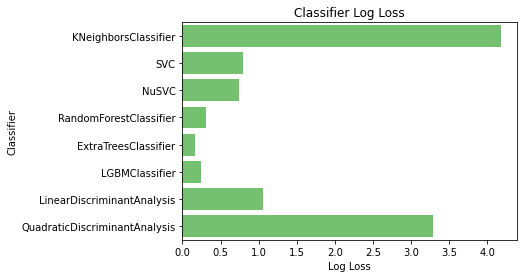

In [17]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier  # k近邻算法
from sklearn.svm import SVC, LinearSVC, NuSVC   #支持向量机分类器、线性支持向量机分类器、核支持向量分类
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier   # 随机森林、极端随机森林、AdaBoost、GradientBoost
from sklearn.naive_bayes import GaussianNB    #朴素贝叶斯GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #线性判别分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   #二次判别分析
import pandas as pd
import lightgbm 
from lightgbm import LGBMClassifier
import seaborn as sns

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf",probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    LGBMClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()]

# 结果可视化
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [18]:
import os
from numpy import loadtxt
import xgboost as xgb
from numpy import sort
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
import warnings
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
warnings.filterwarnings("ignore")
# 加载数据集

CV accuracy scores:[0.90566038 0.88679245 0.91509434 0.86792453 0.8490566  0.9245283
 0.88679245 0.94339623 0.91509434 0.90566038]
Accuracy for XGBoost Classifier :  0.9
[0.0053373  0.00531175 0.00714445 0.01129061 0.00353865 0.0040137
 0.0031775  0.00585415 0.00313446 0.00371056 0.00453321 0.00651036
 0.00228206 0.00570854 0.00308911 0.0060023  0.00417804 0.00473835
 0.00446234 0.00239655 0.00586352 0.00300082 0.00430271 0.00547273
 0.00256192 0.00544857 0.00358993 0.00118671 0.00362943 0.00463283
 0.0032188  0.00407566 0.00597911 0.00814822 0.00822105 0.00529414
 0.00421069 0.00751206 0.00720868 0.0068819  0.00455652 0.0036407
 0.00526001 0.00552269 0.00459355 0.00522754 0.00476293 0.00430873
 0.05305269 0.00861005 0.01250474 0.00869479 0.00678553 0.00423226
 0.00451327 0.00701959 0.04046681 0.00277488 0.00972211 0.0091215
 0.00342716 0.00305109 0.00372681 0.00585824 0.00626987 0.00785238
 0.00640158 0.01009734 0.01506905 0.00554436 0.002319   0.00391983
 0.00418284 0.01055726 0.0105

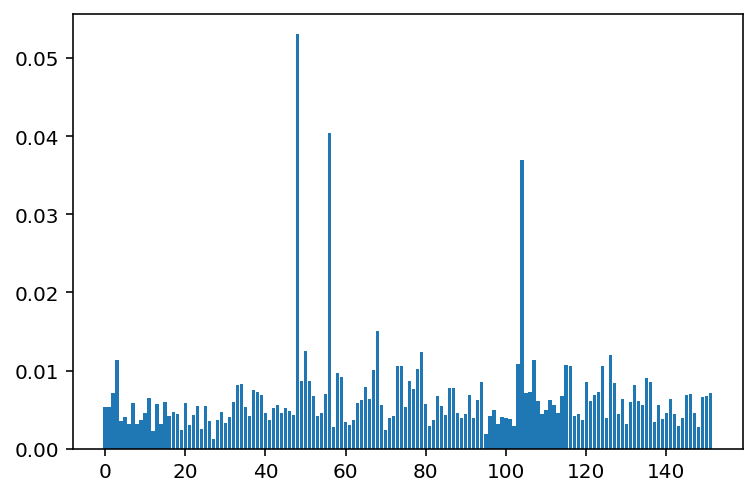

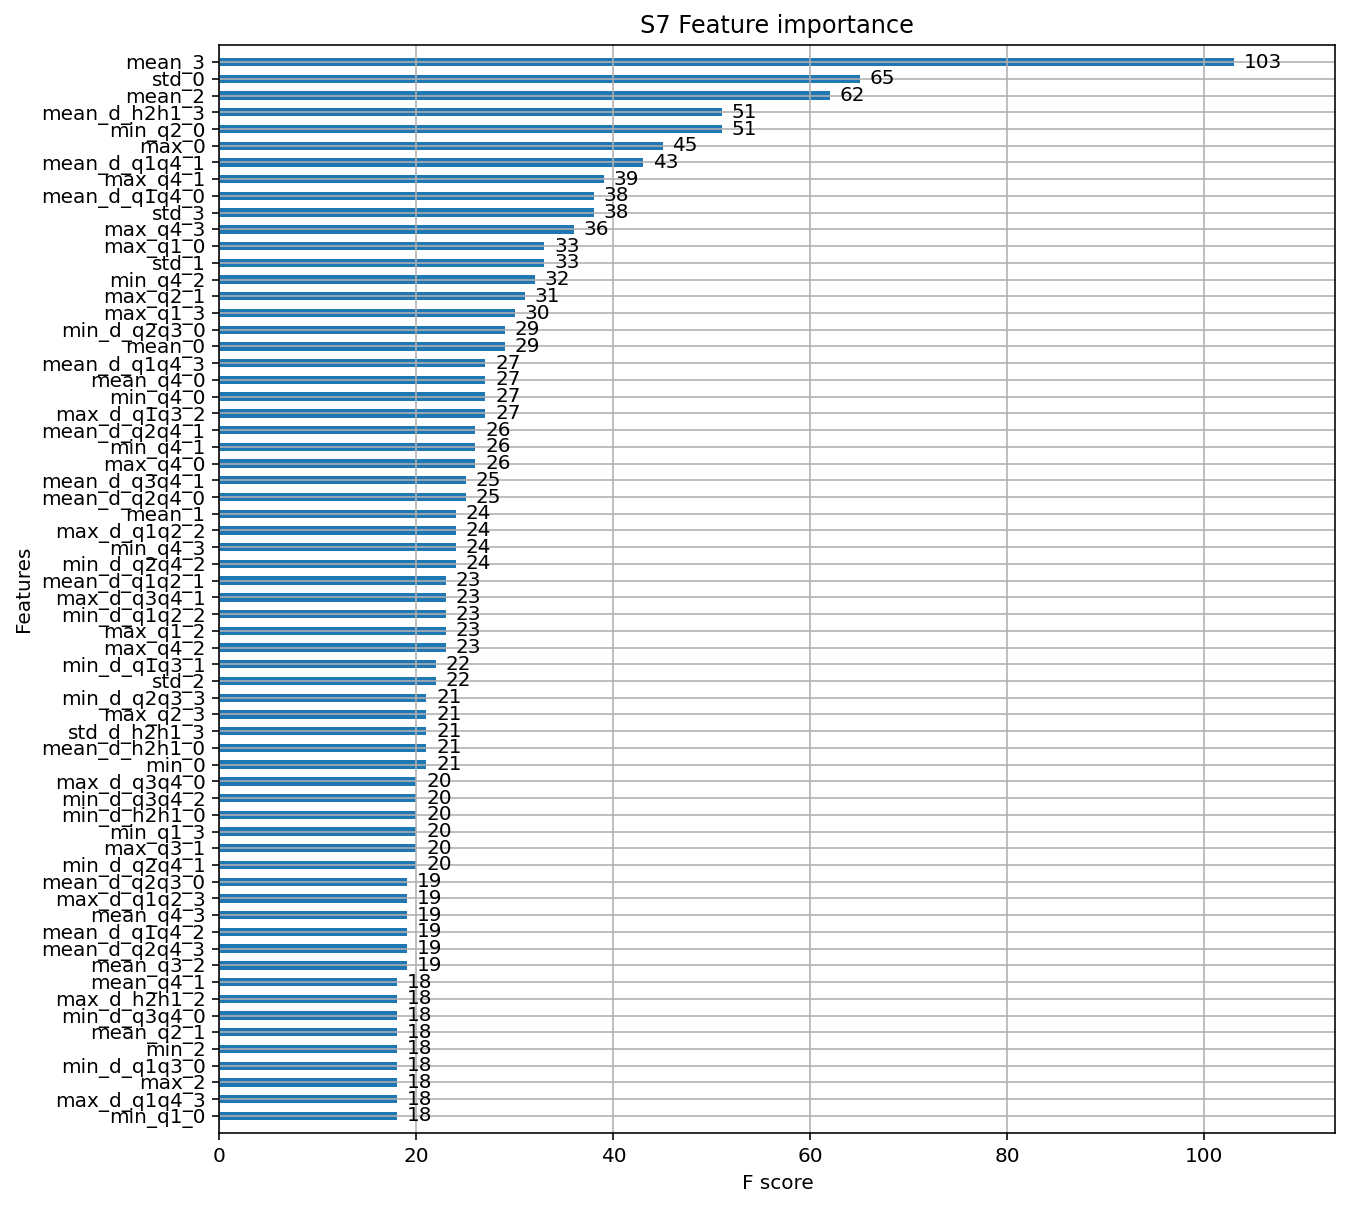

Accuracy: 90.94%
[0.00118671 0.00189913 0.00228206 0.002319   0.00239655 0.00256192
 0.00272767 0.00277488 0.0029283  0.00293585 0.00293682 0.00300082
 0.00305109 0.00308911 0.00313446 0.00317668 0.0031775  0.00319206
 0.0032188  0.00337649 0.00342716 0.00353865 0.00358993 0.00362003
 0.00362943 0.0036407  0.00371056 0.0037246  0.00372681 0.0037701
 0.00380437 0.00387622 0.00390041 0.00390044 0.00390863 0.00391983
 0.00397244 0.00400601 0.0040137  0.00407566 0.0041284  0.00417804
 0.00418284 0.00421069 0.00423226 0.00423308 0.00425522 0.00430271
 0.00430873 0.00440833 0.00442144 0.00445375 0.00445664 0.00446234
 0.00447906 0.00450238 0.00451327 0.00453321 0.00455652 0.00455703
 0.00457213 0.00459355 0.00459732 0.00463283 0.00473835 0.00476293
 0.00489234 0.00489957 0.00522754 0.00526001 0.00529414 0.0052962
 0.00531175 0.0053373  0.00544857 0.00547273 0.00547845 0.00552269
 0.00554232 0.00554436 0.00562794 0.00562989 0.00568988 0.00570854
 0.00585415 0.00585824 0.00586352 0.0059323  0.

In [19]:
          #数据预处理---scale标准化

model=XGBClassifier(objective='multi:softmax',
                                                       n_estimators=150,  # 迭代次数
                                                       learning_rate=0.2,  # 步长
                                                       max_depth=3,  # 树的最大深度
                                                       min_child_weight=1,  # 决定最小叶子节点样本权重和
                                                    
                                                      subsample=0.8,  # 每个决策树所用的子样本占总样本的比例（作用于样本）
                                                       colsample_bytree=0.8, 

                                                     )

#model = XGBClassifier()
model.fit(Xtrain, Ytrain)




scores = cross_val_score(model, Xtrain, Ytrain, cv=10)
print("CV accuracy scores:%s" % scores)
print('Accuracy for XGBoost Classifier : ', scores.mean())
# 变量重要性列表
print(model.feature_importances_)

# 变量重要性可视化

plt.figure(figsize=(6,4), dpi=144)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)


# 变量重要性排序可视化

 
fig,ax = plt.subplots(figsize=(10,10), dpi=144)
plot_importance(model,
                height=0.5,
                ax=ax,
                title='S7 Feature importance',
                max_num_features=64)
plt.show()


# make predictions for test data and evaluate
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


#plot_importance(pl_xgb)
thresholds = sort(model.feature_importances_)
print(thresholds)


acc = []
for thresh in thresholds: # 遍历所有的特征重要性得分，把每个得分作为阈值进行特征选择
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_Xtrain = selection.transform(Xtrain)
# train model
    selection_model = XGBClassifier()
    selection_model.fit(select_Xtrain, Ytrain)
# eval model
    select_Xtest = selection.transform(Xtest)
    y_pred = selection_model.predict(select_Xtest)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Ytest, predictions)
    
   
    acc.append(accuracy)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_Xtrain.shape[1], accuracy*100.0))

print(acc)
    

In [20]:
from sklearn.manifold import TSNE
import time
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123


time_start = time.time()

fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')



t-SNE done! Time elapsed: 3.057002305984497 seconds


In [21]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

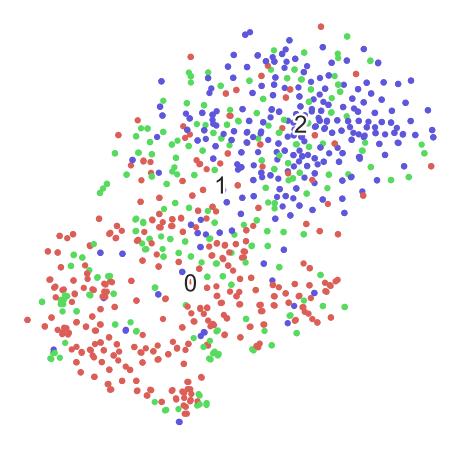

In [22]:
fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

f, ax, sc, txts = fashion_scatter(fashion_tsne, Ytrain)
f.show()

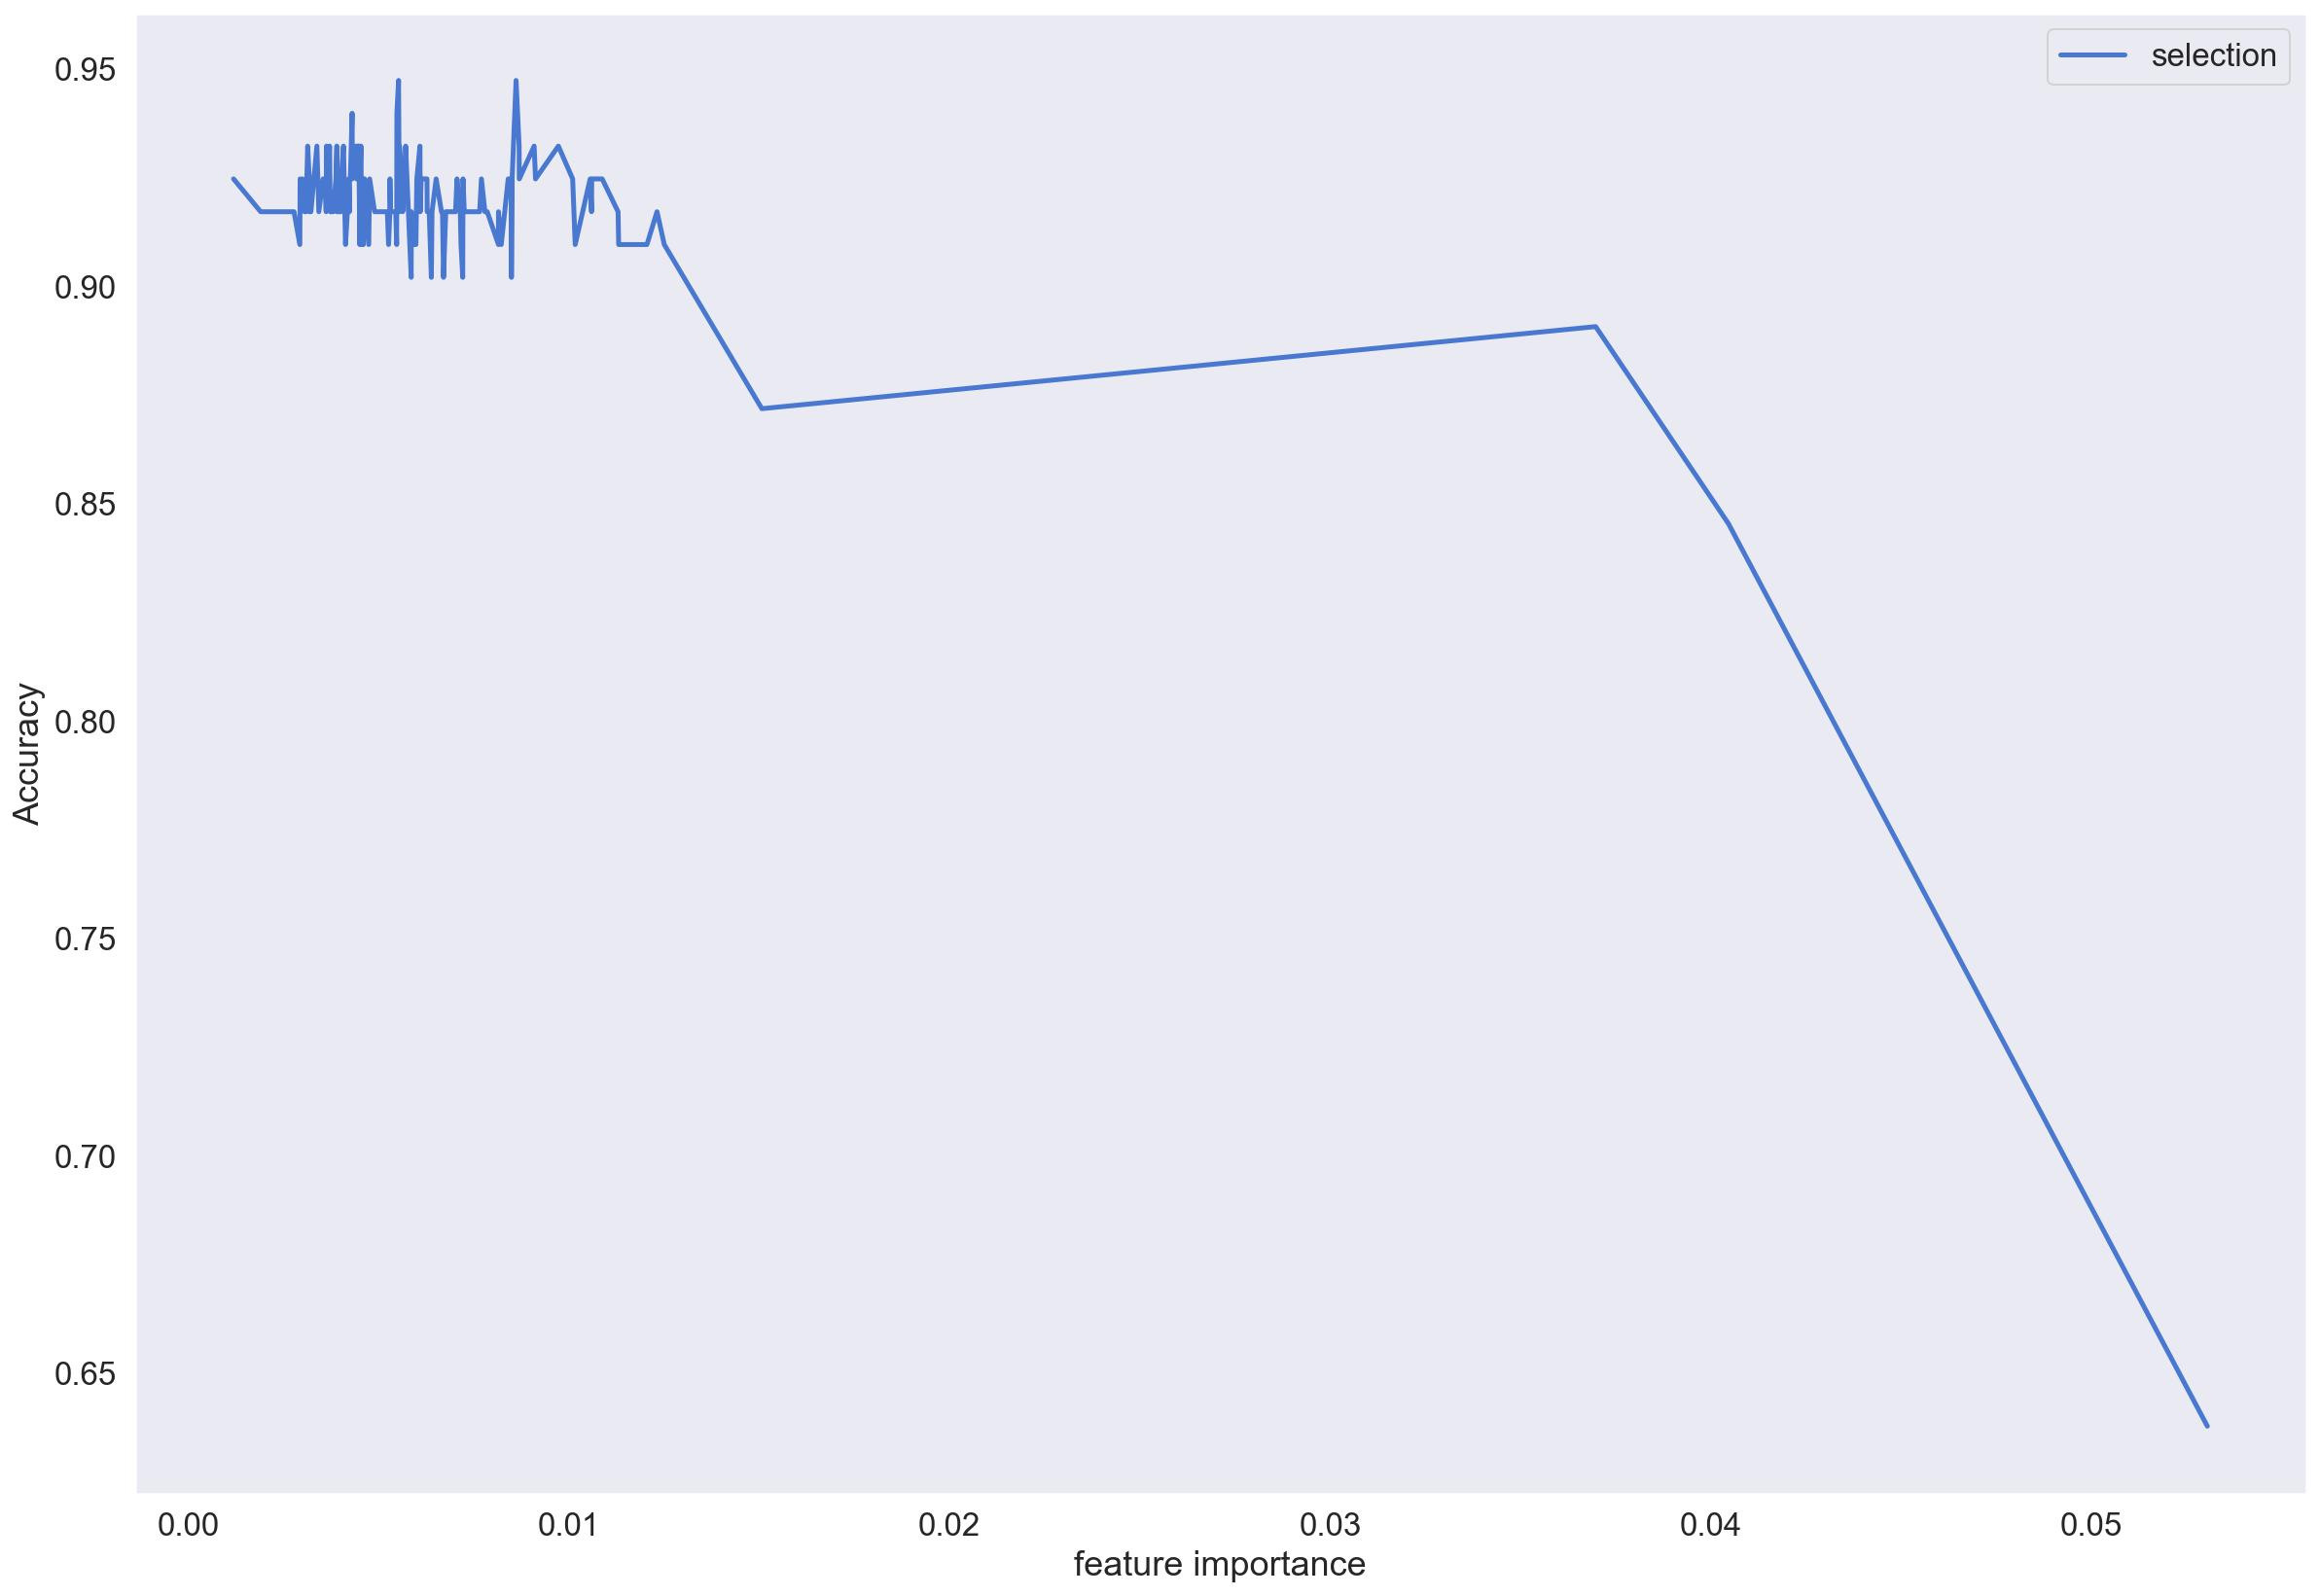

In [23]:
import matplotlib.pyplot as plt



plt.show()
plt.figure(figsize=(20,14), dpi=144)
plt.grid()
plt.xlabel("feature importance")
plt.ylabel("Accuracy")
plt.plot( thresholds,acc, label='selection')

plt.legend()

In [24]:
print(Ytest)
a=np.count_nonzero(Ytest == 1)#Neg
b=np.count_nonzero(Ytest == 2)#Pos
c=np.count_nonzero(Ytest == 0)#Neu
print(a)
print(b)
print(c)

924     2.0
1003    0.0
890     2.0
536     2.0
915     0.0
       ... 
697     0.0
586     1.0
1224    2.0
209     0.0
496     1.0
Name: Label, Length: 265, dtype: float64
77
89
99


In [25]:
#多分类：混淆矩阵

from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Ytest,y_pred)
cfm_normalized = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
print(cfm_normalized)
print(cfm)

[[0.6969697  0.22222222 0.08080808]
 [0.36363636 0.32467532 0.31168831]
 [0.1011236  0.05617978 0.84269663]]
[[69 22  8]
 [28 25 24]
 [ 9  5 75]]


<AxesSubplot:>

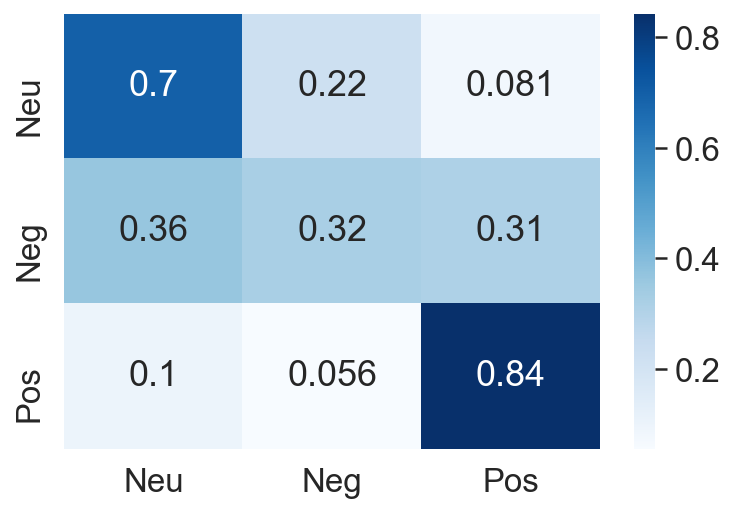

In [26]:
import seaborn as sns

labels=["Neu","Neg","Pos"]
plt.figure(figsize=(6,4), dpi=144)
sns.heatmap(cfm_normalized,annot=True,cmap='Blues',xticklabels=labels,yticklabels= labels)

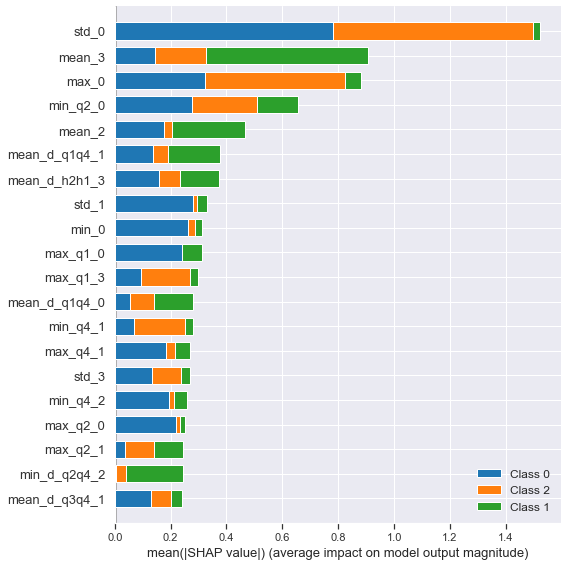

array([[-6.33805804e-03, -9.34692565e-04, -9.44176495e-01,
        -3.96564245e-01, -5.65053187e-02,  1.39173735e-02,
        -9.84955113e-03,  3.05108260e-03, -2.47539785e-02,
         6.85407314e-03,  2.00068243e-02,  1.52582489e-02,
        -2.66650654e-02, -4.76905517e-02,  1.52972462e-02,
         3.45883449e-03, -2.49545760e-02,  3.16750556e-02,
        -4.38858522e-03,  2.81194435e-03, -5.03083691e-02,
         4.38321324e-04,  7.15817790e-04,  4.56279982e-03,
        -1.40724806e-02,  7.01156855e-02,  4.37598396e-03,
        -2.37250887e-02,  1.06871431e-03, -4.09489824e-03,
        -4.55637388e-02, -6.37332201e-02,  1.77036673e-01,
        -1.33102059e-01,  4.63879034e-02,  5.93804643e-02,
        -7.81678110e-02, -3.39858979e-02,  1.08937155e-02,
         1.16943866e-02,  7.87067506e-03, -7.98149109e-02,
        -1.50900744e-02,  1.48185454e-02, -4.54135872e-02,
         1.56336650e-02, -8.31340551e-02,  6.40105316e-03,
        -5.25391009e-03,  1.17572844e-02,  1.59799289e-0

In [27]:
import shap
import matplotlib.pyplot as pl


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xtrain)

shap.summary_plot(shap_values, Xtrain,color=pl.get_cmap("tab10"))
shap_values[1][:2,:]#表示前两个样本对于输出标签为1的shap值

# ---------------------------分割线-----------------------------

# Embedded嵌入法

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [29]:
RFC_ = RFC(n_estimators=10,random_state=0)  # 随机森林实例化

In [30]:
x = data_.iloc[:,:-2]
y = data_.iloc[:,-1]
x.shape

NameError: name 'data_' is not defined

* 阈值为0.005

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.00870999).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
# 确定准确率最高threshold值


score2 = []
for i in np.linspace(0,0.00870999,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00870999,20),score2)
plt.xticks(np.linspace(0,0.00870999,20))
plt.show()

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.003209).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

* 阈值为0.001

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

# Wrapper包装法

In [ ]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=22,step=5).fit(x,y)  # 每迭代一次删除掉50个特征

In [ ]:
selector.support_.sum() #.support_：返回所有的特征的是否最后被选中的布尔矩阵

In [ ]:
selector.ranking_   #返回特征的按数次迭代中综合重要性的排名,越重要的特征排在前面

In [ ]:
x_wrapper = selector.transform(x)

In [ ]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

In [ ]:
# 绘制学习曲线
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()